In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.io
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import random
from sklearn.model_selection import train_test_split
import pandas as pd
from torch.nn import init

In [2]:
read_temp=scipy.io.loadmat(r"C:\Users\Administrator\Desktop\DEEPDOA\code\data2train\data2_trainlow.mat")
S_est=read_temp['S_est']                   #shape:(19800, 120, 2)
#S_abs=read_temp['S_abs']                   #shape:(19800,240)
S_label=read_temp['S_label']               #(19800,120)                     
S_label1 = np.expand_dims(S_label, 2)      #(19800,120,1)

In [3]:
nb_epoch=300
batch_size=60
batch_size_test = 60

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
S_est_train, S_est_test, S_label1_train, S_label1_test = train_test_split(S_est, S_label1, test_size=0.2)

In [6]:
#将训练集和测试集转为Tensor形式，并交换后两维度次序
S_label1_trainTH = torch.Tensor(S_label1_train).permute(0,2,1)
S_label1_testTH = torch.Tensor(S_label1_test).permute(0,2,1)
S_est_trainTH = torch.Tensor(S_est_train).permute(0,2,1)
S_est_testTH = torch.Tensor(S_est_test).permute(0,2,1)

S_est_trainTH = S_est_trainTH.to(device)
S_est_testTH = S_est_testTH.to(device)
S_label1_trainTH = S_label1_trainTH.to(device) 
S_label1_testTH = S_label1_testTH.to(device)

In [7]:
#将数据和标签一一对应
a = ()
for i in range(0,15840):
    a += ((S_est_trainTH[i], S_label1_trainTH[i]),)

b = ()
for i in range(0,3960):
    b += ((S_est_testTH[i], S_label1_testTH[i]),)

In [8]:
train_loader = torch.utils.data.DataLoader(a, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(b, batch_size=batch_size_test, shuffle=False)

In [55]:
#CNN网络结构
class CNN_4(nn.Module):
    def __init__(self,activ):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,12,kernel_size=25, padding=12), nn.BatchNorm1d(12), activ())
        self.conv2 = nn.Sequential(nn.Conv1d(12,6,kernel_size=15, padding=7),  nn.BatchNorm1d(6), activ())
        self.conv3 = nn.Sequential(nn.Conv1d(6,3,kernel_size=5, padding=2), nn.BatchNorm1d(3), activ())
        self.conv4 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1), activ())
    
    def forward(self, x):  
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
       
        return out

In [10]:
class CNN_5(nn.Module):
    def __init__(self,activ):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,24,kernel_size=25, padding=12), nn.BatchNorm1d(24), activ())
        self.conv2 = nn.Sequential(nn.Conv1d(24,12,kernel_size=15, padding=7),  nn.BatchNorm1d(12), activ())
        self.conv3 = nn.Sequential(nn.Conv1d(12,6,kernel_size=5, padding=2), nn.BatchNorm1d(6), activ())
        self.conv4 = nn.Sequential(nn.Conv1d(6,3,kernel_size=3, padding=1),nn.BatchNorm1d(3), activ())
        self.conv5 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1), activ())
    
    def forward(self, x):  
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        
        return out

In [11]:
class CNN_6(nn.Module):
    def __init__(self,activ):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,48,kernel_size=25, padding=12), nn.BatchNorm1d(48), activ())
        self.conv2 = nn.Sequential(nn.Conv1d(48,24,kernel_size=15, padding=7),  nn.BatchNorm1d(24), activ())
        self.conv3 = nn.Sequential(nn.Conv1d(24,12,kernel_size=5, padding=2), nn.BatchNorm1d(12), activ())
        self.conv4 = nn.Sequential(nn.Conv1d(12,6,kernel_size=3, padding=1),nn.BatchNorm1d(6), activ())
        self.conv5 = nn.Sequential(nn.Conv1d(6,3,kernel_size=3, padding=1),nn.BatchNorm1d(3), activ())
        self.conv6 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1), activ())
    
    def forward(self, x):  
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)
        
        return out

In [12]:
class CNN_7(nn.Module):
    def __init__(self,activ):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,96,kernel_size=25, padding=12), nn.BatchNorm1d(96), activ())
        self.conv2 = nn.Sequential(nn.Conv1d(96,48,kernel_size=15, padding=7),  nn.BatchNorm1d(48), activ())
        self.conv3 = nn.Sequential(nn.Conv1d(48,24,kernel_size=5, padding=2), nn.BatchNorm1d(24), activ())
        self.conv4 = nn.Sequential(nn.Conv1d(24,12,kernel_size=3, padding=1),nn.BatchNorm1d(12), activ())
        self.conv5 = nn.Sequential(nn.Conv1d(12,6,kernel_size=3, padding=1),nn.BatchNorm1d(6), activ())
        self.conv6 = nn.Sequential(nn.Conv1d(6,3,kernel_size=3, padding=1),nn.BatchNorm1d(3), activ())
        self.conv7 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1), activ())
    
    def forward(self, x):  
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.conv7(out)
        
        return out

In [13]:
class CNN_resnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,12,kernel_size=25, padding=12), nn.BatchNorm1d(12))
        self.conv2 = nn.Sequential(nn.Conv1d(12,6,kernel_size=15, padding=7),  nn.BatchNorm1d(6))
        self.conv3 = nn.Sequential(nn.Conv1d(6,3,kernel_size=5, padding=2), nn.BatchNorm1d(3))
        self.conv4 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1))
        self.trans1 = nn.Conv1d(2,6,kernel_size=1, padding=0)
        self.trans2 = nn.Conv1d(6,1,kernel_size=1, padding=0)
    
    def forward(self, x):  
        y1 = F.relu(self.conv1(x))
        y2 = F.relu(self.trans1(x) + self.conv2(y1))
        y3 = F.relu(self.conv3(y2))
        y4 = F.relu(self.trans2(y2)+self.conv4(y3))
       
        return y4

In [14]:
class CNN_resnet_5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,24,kernel_size=25, padding=12), nn.BatchNorm1d(24))
        self.conv2 = nn.Sequential(nn.Conv1d(24,12,kernel_size=15, padding=7),  nn.BatchNorm1d(12))
        self.conv3 = nn.Sequential(nn.Conv1d(12,6,kernel_size=5, padding=2), nn.BatchNorm1d(6))
        self.conv4 = nn.Sequential(nn.Conv1d(6,3,kernel_size=3, padding=1),nn.BatchNorm1d(3))
        self.conv5 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1))
        self.trans1 = nn.Conv1d(2,12,kernel_size=1, padding=0)
        self.trans2 = nn.Conv1d(12,3,kernel_size=1, padding=0)
    
    def forward(self, x):  
        y1 = F.relu(self.conv1(x))
        y2 = F.relu(self.trans1(x) + self.conv2(y1))
        y3 = F.relu(self.conv3(y2))
        y4 = F.relu(self.trans2(y2)+self.conv4(y3))
        y5 = F.relu(self.conv5(y4))
       
        return y5

In [9]:
class CNN_resnet_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,48,kernel_size=25, padding=12), nn.BatchNorm1d(48))
        self.conv2 = nn.Sequential(nn.Conv1d(48,24,kernel_size=15, padding=7),  nn.BatchNorm1d(24))
        self.conv3 = nn.Sequential(nn.Conv1d(24,12,kernel_size=5, padding=2), nn.BatchNorm1d(12))
        self.conv4 = nn.Sequential(nn.Conv1d(12,6,kernel_size=3, padding=1),nn.BatchNorm1d(6))
        self.conv5 = nn.Sequential(nn.Conv1d(6,3,kernel_size=3, padding=1),nn.BatchNorm1d(3))
        self.conv6 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1))
        self.trans1 = nn.Conv1d(2,24,kernel_size=1, padding=0)
        self.trans2 = nn.Conv1d(24,6,kernel_size=1, padding=0)
        self.trans3 = nn.Conv1d(6,1,kernel_size=1, padding=0)
    def forward(self, x):  
        y1 = F.relu(self.conv1(x))
        y2 = F.relu(self.trans1(x) + self.conv2(y1))
        y3 = F.relu(self.conv3(y2))
        y4 = F.relu(self.trans2(y2) + self.conv4(y3))
        y5 = F.relu(self.conv5(y4))
        y6 = F.relu(self.trans3(y4) + self.conv6(y5))
       
        return y6

In [16]:
class CNN_resnet_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv1d(2,96,kernel_size=25, padding=12), nn.BatchNorm1d(96))
        self.conv2 = nn.Sequential(nn.Conv1d(96,48,kernel_size=15, padding=7),  nn.BatchNorm1d(48))
        self.conv3 = nn.Sequential(nn.Conv1d(48,24,kernel_size=5, padding=2), nn.BatchNorm1d(24))
        self.conv4 = nn.Sequential(nn.Conv1d(24,12,kernel_size=3, padding=1),nn.BatchNorm1d(12))
        self.conv5 = nn.Sequential(nn.Conv1d(12,6,kernel_size=3, padding=1),nn.BatchNorm1d(6))
        self.conv6 = nn.Sequential(nn.Conv1d(6,3,kernel_size=3, padding=1),nn.BatchNorm1d(3))
        self.conv7 = nn.Sequential(nn.Conv1d(3,1,kernel_size=3, padding=1),nn.BatchNorm1d(1))
        self.trans1 = nn.Conv1d(2,48,kernel_size=1, padding=0)
        self.trans2 = nn.Conv1d(48,12,kernel_size=1, padding=0)
        self.trans3 = nn.Conv1d(12,3,kernel_size=1, padding=0)
    def forward(self, x):  
        y1 = F.relu(self.conv1(x))
        y2 = F.relu(self.trans1(x) + self.conv2(y1))
        y3 = F.relu(self.conv3(y2))
        y4 = F.relu(self.trans2(y2) + self.conv4(y3))
        y5 = F.relu(self.conv5(y4))
        y6 = F.relu(self.trans3(y4) + self.conv6(y5))
        y7 = F.relu(self.conv7(y6))
       
        return y7

In [10]:
def weigth_init(m):
    if isinstance(m, nn.Conv1d):
        init.kaiming_uniform_(m.weight.data)
        init.constant_(m.bias.data,0.1)
    elif isinstance(m, nn.BatchNorm1d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
#   elif isinstance(m, nn.Linear):
#      m.weight.data.normal_(0,0.01)
#       m.bias.data.zero_()


In [11]:
cnn_relu_resnet_6 = CNN_resnet_6().to(device)
cnn_relu_resnet_6.apply(weigth_init)

CNN_resnet_6(
  (conv1): Sequential(
    (0): Conv1d(2, 48, kernel_size=(25,), stride=(1,), padding=(12,))
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv1d(48, 24, kernel_size=(15,), stride=(1,), padding=(7,))
    (1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv1d(24, 12, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv1d(12, 6, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv1d(6, 3, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv6): Sequential(
    (0): Conv1d(3, 1, kernel_size=(3,), s

In [18]:
cnn_relu_4 = CNN_4(nn.ReLU).to(device)
cnn_relu_5 = CNN_5(nn.ReLU).to(device)
cnn_relu_6 = CNN_6(nn.ReLU).to(device)
cnn_relu_7 = CNN_7(nn.ReLU).to(device)
#cnn_tanh = CNN(nn.Tanh).to(device)
#cnn_sigmoid = CNN(nn.Sigmoid).to(device)
cnn_relu_resnet_4 = CNN_resnet().to(device)
cnn_relu_resnet_5 = CNN_resnet_5().to(device)
cnn_relu_resnet_6 = CNN_resnet_6().to(device)
cnn_relu_resnet_7 = CNN_resnet_7().to(device)



cnn_relu_4.apply(weigth_init)
cnn_relu_5.apply(weigth_init)
cnn_relu_6.apply(weigth_init)
cnn_relu_7.apply(weigth_init)
cnn_relu_resnet_4.apply(weigth_init)
cnn_relu_resnet_5.apply(weigth_init)
cnn_relu_resnet_6.apply(weigth_init)
cnn_relu_resnet_7.apply(weigth_init)

CNN_resnet_7(
  (conv1): Sequential(
    (0): Conv1d(2, 96, kernel_size=(25,), stride=(1,), padding=(12,))
    (1): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv1d(96, 48, kernel_size=(15,), stride=(1,), padding=(7,))
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv1d(48, 24, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv1d(24, 12, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv1d(12, 6, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv6): Sequential(
    (0): Conv1d(6, 3, kernel_size=(3,)

In [12]:
loss_func = torch.nn.MSELoss()

In [13]:
#定义训练过程

def train(epoch, model, optimizer):
    
    optimizer = optimizer(model.parameters(), lr=0.001)
   
    for  batch_idx, (data, target) in enumerate(train_loader):
        
        optimizer.zero_grad()        
#        data, target = Variable(data), Variable(target)
        output = model(data)
        
        loss = loss_func(output, target)
        
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tloss: {:.4f}'.format(
                epoch+1, loss.item()
            ))
    
    return loss.item()

In [17]:
def test_rmse(model):
    
    a = 0
    
    for (data,label) in test_loader: 
        c = model(data)
        c1 = c.cpu().detach()
        labe = label.cpu()
        
        for i in range(0, 60):
            bias = c1[i,0] - labe[i,0]
            bias_norm = torch.norm(bias, p=1)
            bias_norm_sqr = torch.pow(bias_norm,2)
            a += bias_norm_sqr
            
    
    RMSE = torch.sqrt(a/(3960*2))
    
    return RMSE,c1

In [25]:
#cnn+relu+4layers
#loss_list_4 = []
for epoch in range(0,150):
    train(epoch, cnn_relu_4, optim.Adam)
#loss_epoch = train(epoch, cnn_relu_4)
#    loss_list_4.append(loss_epoch*1000)      


test_4 = test_rmse(cnn_relu_4)

Train Epoch: 1 	loss: 0.0160
Train Epoch: 2 	loss: 0.0122
Train Epoch: 3 	loss: 0.0110
Train Epoch: 4 	loss: 0.0112
Train Epoch: 5 	loss: 0.0110
Train Epoch: 6 	loss: 0.0112
Train Epoch: 7 	loss: 0.0113
Train Epoch: 8 	loss: 0.0105
Train Epoch: 9 	loss: 0.0110
Train Epoch: 10 	loss: 0.0101
Train Epoch: 11 	loss: 0.0091
Train Epoch: 12 	loss: 0.0097
Train Epoch: 13 	loss: 0.0103
Train Epoch: 14 	loss: 0.0105
Train Epoch: 15 	loss: 0.0109
Train Epoch: 16 	loss: 0.0105
Train Epoch: 17 	loss: 0.0100
Train Epoch: 18 	loss: 0.0098
Train Epoch: 19 	loss: 0.0111
Train Epoch: 20 	loss: 0.0109
Train Epoch: 21 	loss: 0.0106
Train Epoch: 22 	loss: 0.0105
Train Epoch: 23 	loss: 0.0106
Train Epoch: 24 	loss: 0.0113
Train Epoch: 25 	loss: 0.0103
Train Epoch: 26 	loss: 0.0098
Train Epoch: 27 	loss: 0.0104
Train Epoch: 28 	loss: 0.0105
Train Epoch: 29 	loss: 0.0094
Train Epoch: 30 	loss: 0.0115
Train Epoch: 31 	loss: 0.0111
Train Epoch: 32 	loss: 0.0108
Train Epoch: 33 	loss: 0.0104
Train Epoch: 34 	lo

In [27]:
#cnn+relu+5layers
#loss_list_5 = []
for epoch in range(0,150):
    train(epoch, cnn_relu_5, optim.Adam)
#loss_epoch = train(epoch, cnn_relu_5)
#    loss_list_5.append(loss_epoch*1000)      

test_5 = test_rmse(cnn_relu_5)

Train Epoch: 1 	loss: 0.0138
Train Epoch: 2 	loss: 0.0112
Train Epoch: 3 	loss: 0.0108
Train Epoch: 4 	loss: 0.0110
Train Epoch: 5 	loss: 0.0107
Train Epoch: 6 	loss: 0.0115
Train Epoch: 7 	loss: 0.0107
Train Epoch: 8 	loss: 0.0103
Train Epoch: 9 	loss: 0.0094
Train Epoch: 10 	loss: 0.0108
Train Epoch: 11 	loss: 0.0095
Train Epoch: 12 	loss: 0.0097
Train Epoch: 13 	loss: 0.0100
Train Epoch: 14 	loss: 0.0105
Train Epoch: 15 	loss: 0.0103
Train Epoch: 16 	loss: 0.0095
Train Epoch: 17 	loss: 0.0109
Train Epoch: 18 	loss: 0.0108
Train Epoch: 19 	loss: 0.0102
Train Epoch: 20 	loss: 0.0096
Train Epoch: 21 	loss: 0.0103
Train Epoch: 22 	loss: 0.0105
Train Epoch: 23 	loss: 0.0096
Train Epoch: 24 	loss: 0.0103
Train Epoch: 25 	loss: 0.0094
Train Epoch: 26 	loss: 0.0096
Train Epoch: 27 	loss: 0.0096
Train Epoch: 28 	loss: 0.0107
Train Epoch: 29 	loss: 0.0097
Train Epoch: 30 	loss: 0.0106
Train Epoch: 31 	loss: 0.0099
Train Epoch: 32 	loss: 0.0094
Train Epoch: 33 	loss: 0.0099
Train Epoch: 34 	lo

TypeError: 'test_5' is an invalid keyword argument for print()

In [28]:
test_5 = test_rmse(cnn_relu_5)

In [29]:
#cnn+relu+6layers
#loss_list_6 = []
for epoch in range(0,150):
    train(epoch, cnn_relu_6, optim.Adam)
#loss_epoch = train(epoch, cnn_relu_6)
#    loss_list_6.append(loss_epoch*1000)      


test_6 = test_rmse(cnn_relu_6)

Train Epoch: 1 	loss: 0.0155
Train Epoch: 2 	loss: 0.0120
Train Epoch: 3 	loss: 0.0106
Train Epoch: 4 	loss: 0.0104
Train Epoch: 5 	loss: 0.0102
Train Epoch: 6 	loss: 0.0094
Train Epoch: 7 	loss: 0.0097
Train Epoch: 8 	loss: 0.0104
Train Epoch: 9 	loss: 0.0105
Train Epoch: 10 	loss: 0.0117
Train Epoch: 11 	loss: 0.0098
Train Epoch: 12 	loss: 0.0103
Train Epoch: 13 	loss: 0.0110
Train Epoch: 14 	loss: 0.0113
Train Epoch: 15 	loss: 0.0104
Train Epoch: 16 	loss: 0.0094
Train Epoch: 17 	loss: 0.0092
Train Epoch: 18 	loss: 0.0107
Train Epoch: 19 	loss: 0.0092
Train Epoch: 20 	loss: 0.0109
Train Epoch: 21 	loss: 0.0093
Train Epoch: 22 	loss: 0.0100
Train Epoch: 23 	loss: 0.0098
Train Epoch: 24 	loss: 0.0093
Train Epoch: 25 	loss: 0.0098
Train Epoch: 26 	loss: 0.0102
Train Epoch: 27 	loss: 0.0096
Train Epoch: 28 	loss: 0.0100
Train Epoch: 29 	loss: 0.0085
Train Epoch: 30 	loss: 0.0097
Train Epoch: 31 	loss: 0.0096
Train Epoch: 32 	loss: 0.0085
Train Epoch: 33 	loss: 0.0098
Train Epoch: 34 	lo

In [33]:
test_5


tensor(1.6571)

In [34]:
#cnn+relu+7layers
#loss_list_7 = []
for epoch in range(0,150):
    train(epoch, cnn_relu_7, optim.Adam)
#    loss_epoch = train(epoch, cnn_relu_6)
#    loss_list_7.append(loss_epoch*1000)      


test_7 = test_rmse(cnn_relu_7)

Train Epoch: 1 	loss: 0.0132
Train Epoch: 2 	loss: 0.0111
Train Epoch: 3 	loss: 0.0113
Train Epoch: 4 	loss: 0.0107
Train Epoch: 5 	loss: 0.0104
Train Epoch: 6 	loss: 0.0102
Train Epoch: 7 	loss: 0.0099
Train Epoch: 8 	loss: 0.0100
Train Epoch: 9 	loss: 0.0098
Train Epoch: 10 	loss: 0.0101
Train Epoch: 11 	loss: 0.0094
Train Epoch: 12 	loss: 0.0097
Train Epoch: 13 	loss: 0.0100
Train Epoch: 14 	loss: 0.0104
Train Epoch: 15 	loss: 0.0095
Train Epoch: 16 	loss: 0.0091
Train Epoch: 17 	loss: 0.0088
Train Epoch: 18 	loss: 0.0101
Train Epoch: 19 	loss: 0.0104
Train Epoch: 20 	loss: 0.0093
Train Epoch: 21 	loss: 0.0083
Train Epoch: 22 	loss: 0.0106
Train Epoch: 23 	loss: 0.0121
Train Epoch: 24 	loss: 0.0091
Train Epoch: 25 	loss: 0.0097
Train Epoch: 26 	loss: 0.0108
Train Epoch: 27 	loss: 0.0096
Train Epoch: 28 	loss: 0.0094
Train Epoch: 29 	loss: 0.0099
Train Epoch: 30 	loss: 0.0101
Train Epoch: 31 	loss: 0.0089
Train Epoch: 32 	loss: 0.0094
Train Epoch: 33 	loss: 0.0100
Train Epoch: 34 	lo

In [41]:
#cnn+relu+resnet
for epoch in range(0,150):
    
    train(epoch, cnn_relu_resnet_4, optim.Adam)
    
test_resnet_4 = test_rmse(cnn_relu_resnet_4)


Train Epoch: 1 	loss: 0.0154
Train Epoch: 2 	loss: 0.0128
Train Epoch: 3 	loss: 0.0129
Train Epoch: 4 	loss: 0.0121
Train Epoch: 5 	loss: 0.0113
Train Epoch: 6 	loss: 0.0121
Train Epoch: 7 	loss: 0.0110
Train Epoch: 8 	loss: 0.0103
Train Epoch: 9 	loss: 0.0108
Train Epoch: 10 	loss: 0.0102
Train Epoch: 11 	loss: 0.0124
Train Epoch: 12 	loss: 0.0118
Train Epoch: 13 	loss: 0.0113
Train Epoch: 14 	loss: 0.0108
Train Epoch: 15 	loss: 0.0107
Train Epoch: 16 	loss: 0.0111
Train Epoch: 17 	loss: 0.0118
Train Epoch: 18 	loss: 0.0113
Train Epoch: 19 	loss: 0.0110
Train Epoch: 20 	loss: 0.0114
Train Epoch: 21 	loss: 0.0110
Train Epoch: 22 	loss: 0.0095
Train Epoch: 23 	loss: 0.0111
Train Epoch: 24 	loss: 0.0100
Train Epoch: 25 	loss: 0.0097
Train Epoch: 26 	loss: 0.0115
Train Epoch: 27 	loss: 0.0110
Train Epoch: 28 	loss: 0.0099
Train Epoch: 29 	loss: 0.0110
Train Epoch: 30 	loss: 0.0105
Train Epoch: 31 	loss: 0.0102
Train Epoch: 32 	loss: 0.0109
Train Epoch: 33 	loss: 0.0103
Train Epoch: 34 	lo

In [37]:
#cnn+relu+resnet_5
for epoch in range(0,150):
    
    train(epoch, cnn_relu_resnet_5, optim.Adam)
    
test_resnet_5 = test_rmse(cnn_relu_resnet_5)


Train Epoch: 1 	loss: 0.0132
Train Epoch: 2 	loss: 0.0100
Train Epoch: 3 	loss: 0.0109
Train Epoch: 4 	loss: 0.0105
Train Epoch: 5 	loss: 0.0096
Train Epoch: 6 	loss: 0.0103
Train Epoch: 7 	loss: 0.0108
Train Epoch: 8 	loss: 0.0105
Train Epoch: 9 	loss: 0.0104
Train Epoch: 10 	loss: 0.0105
Train Epoch: 11 	loss: 0.0098
Train Epoch: 12 	loss: 0.0115
Train Epoch: 13 	loss: 0.0111
Train Epoch: 14 	loss: 0.0116
Train Epoch: 15 	loss: 0.0103
Train Epoch: 16 	loss: 0.0092
Train Epoch: 17 	loss: 0.0106
Train Epoch: 18 	loss: 0.0106
Train Epoch: 19 	loss: 0.0110
Train Epoch: 20 	loss: 0.0091
Train Epoch: 21 	loss: 0.0099
Train Epoch: 22 	loss: 0.0104
Train Epoch: 23 	loss: 0.0092
Train Epoch: 24 	loss: 0.0098
Train Epoch: 25 	loss: 0.0102
Train Epoch: 26 	loss: 0.0106
Train Epoch: 27 	loss: 0.0099
Train Epoch: 28 	loss: 0.0099
Train Epoch: 29 	loss: 0.0113
Train Epoch: 30 	loss: 0.0094
Train Epoch: 31 	loss: 0.0108
Train Epoch: 32 	loss: 0.0102
Train Epoch: 33 	loss: 0.0100
Train Epoch: 34 	lo

In [15]:
#cnn+relu+resnet_6
for epoch in range(0,150):
    
    train(epoch, cnn_relu_resnet_6, optim.Adam)
    
test_resnet_6 = test_rmse(cnn_relu_resnet_6)

Train Epoch: 1 	loss: 0.0113
Train Epoch: 2 	loss: 0.0109
Train Epoch: 3 	loss: 0.0113
Train Epoch: 4 	loss: 0.0092
Train Epoch: 5 	loss: 0.0107
Train Epoch: 6 	loss: 0.0102
Train Epoch: 7 	loss: 0.0106
Train Epoch: 8 	loss: 0.0103
Train Epoch: 9 	loss: 0.0100
Train Epoch: 10 	loss: 0.0099
Train Epoch: 11 	loss: 0.0093
Train Epoch: 12 	loss: 0.0097
Train Epoch: 13 	loss: 0.0096
Train Epoch: 14 	loss: 0.0105
Train Epoch: 15 	loss: 0.0105
Train Epoch: 16 	loss: 0.0094
Train Epoch: 17 	loss: 0.0099
Train Epoch: 18 	loss: 0.0109
Train Epoch: 19 	loss: 0.0105
Train Epoch: 20 	loss: 0.0093
Train Epoch: 21 	loss: 0.0094
Train Epoch: 22 	loss: 0.0104
Train Epoch: 23 	loss: 0.0115
Train Epoch: 24 	loss: 0.0103
Train Epoch: 25 	loss: 0.0105
Train Epoch: 26 	loss: 0.0094
Train Epoch: 27 	loss: 0.0095
Train Epoch: 28 	loss: 0.0096
Train Epoch: 29 	loss: 0.0099
Train Epoch: 30 	loss: 0.0093
Train Epoch: 31 	loss: 0.0094
Train Epoch: 32 	loss: 0.0093
Train Epoch: 33 	loss: 0.0101
Train Epoch: 34 	lo

In [18]:
test_resnet_6, c1 = test_rmse(cnn_relu_resnet_6)

In [27]:
test_resnet_6

tensor(1.6863)

In [20]:
np.shape(c1)

torch.Size([60, 1, 120])

In [48]:
#cnn+relu+resnet_7
for epoch in range(0,150):
    
    train(epoch, cnn_relu_resnet_7, optim.Adam)
    
test_resnet_7 = test_rmse(cnn_relu_resnet_7)

Train Epoch: 1 	loss: 0.0128
Train Epoch: 2 	loss: 0.0108
Train Epoch: 3 	loss: 0.0107
Train Epoch: 4 	loss: 0.0106
Train Epoch: 5 	loss: 0.0092
Train Epoch: 6 	loss: 0.0101
Train Epoch: 7 	loss: 0.0098
Train Epoch: 8 	loss: 0.0085
Train Epoch: 9 	loss: 0.0100
Train Epoch: 10 	loss: 0.0091
Train Epoch: 11 	loss: 0.0096
Train Epoch: 12 	loss: 0.0099
Train Epoch: 13 	loss: 0.0090
Train Epoch: 14 	loss: 0.0102
Train Epoch: 15 	loss: 0.0106
Train Epoch: 16 	loss: 0.0101
Train Epoch: 17 	loss: 0.0088
Train Epoch: 18 	loss: 0.0084
Train Epoch: 19 	loss: 0.0110
Train Epoch: 20 	loss: 0.0088
Train Epoch: 21 	loss: 0.0090
Train Epoch: 22 	loss: 0.0090
Train Epoch: 23 	loss: 0.0096
Train Epoch: 24 	loss: 0.0097
Train Epoch: 25 	loss: 0.0098
Train Epoch: 26 	loss: 0.0102
Train Epoch: 27 	loss: 0.0100
Train Epoch: 28 	loss: 0.0102
Train Epoch: 29 	loss: 0.0098
Train Epoch: 30 	loss: 0.0099
Train Epoch: 31 	loss: 0.0090
Train Epoch: 32 	loss: 0.0097
Train Epoch: 33 	loss: 0.0089
Train Epoch: 34 	lo

In [84]:
a1 = [4,5,6,7]
test4 = np.array(test_4)+0
test5 = np.array(test_5)+0
test6 = np.array(test_6)+0
test7 = np.array(test_7)+0
testr4 = np.array(test_resnet_4)+0
testr5 = np.array(test_resnet_5)+0
testr6 = np.array(test_resnet_6)+0
testr7 = np.array(test_resnet_7)+0
a3 = [test4,test5,test6,test7]
a4 = [testr4,testr5,testr6,testr7]



In [16]:
testr6 = np.array(test_resnet_6)+0

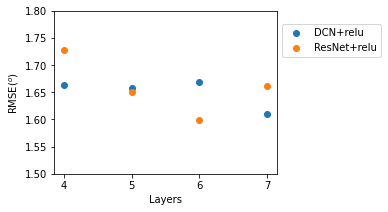

In [98]:
figsize = 4,3
figure, ax = plt.subplots(figsize=figsize)
plt.ylim([1.5,1.8])
plt.xticks(range(4, 8, 1))
plt.scatter(a1,a3, marker="o")
plt.scatter(a1,a4)
plt.xlabel('Layers')
plt.ylabel('RMSE($^o$)') 
plt.legend(['DCN+relu','ResNet+relu'],loc='upper left', bbox_to_anchor=(1, 0.95))
plt.show()


In [61]:
#cnn+relu_4_SGD
cnn_relu_4 = CNN_4(nn.ReLU).to(device)
cnn_relu_4.apply(weigth_init)
cnn_relu_4.apply(weigth_init)
loss_list_62 = []
for epoch in range(0,300):
    
    loss_epoch = train(epoch, cnn_relu_4, optim.SGD)
    loss_list_62.append(loss_epoch*1000)
    
test_resnet_62 = test_rmse(cnn_relu_4)


Train Epoch: 1 	loss: 0.1488
Train Epoch: 2 	loss: 0.0681
Train Epoch: 3 	loss: 0.0384
Train Epoch: 4 	loss: 0.0285
Train Epoch: 5 	loss: 0.0221
Train Epoch: 6 	loss: 0.0221
Train Epoch: 7 	loss: 0.0195
Train Epoch: 8 	loss: 0.0193
Train Epoch: 9 	loss: 0.0177
Train Epoch: 10 	loss: 0.0170
Train Epoch: 11 	loss: 0.0171
Train Epoch: 12 	loss: 0.0170
Train Epoch: 13 	loss: 0.0173
Train Epoch: 14 	loss: 0.0171
Train Epoch: 15 	loss: 0.0161
Train Epoch: 16 	loss: 0.0159
Train Epoch: 17 	loss: 0.0160
Train Epoch: 18 	loss: 0.0156
Train Epoch: 19 	loss: 0.0159
Train Epoch: 20 	loss: 0.0156
Train Epoch: 21 	loss: 0.0163
Train Epoch: 22 	loss: 0.0153
Train Epoch: 23 	loss: 0.0159
Train Epoch: 24 	loss: 0.0150
Train Epoch: 25 	loss: 0.0155
Train Epoch: 26 	loss: 0.0156
Train Epoch: 27 	loss: 0.0158
Train Epoch: 28 	loss: 0.0155
Train Epoch: 29 	loss: 0.0150
Train Epoch: 30 	loss: 0.0153
Train Epoch: 31 	loss: 0.0156
Train Epoch: 32 	loss: 0.0149
Train Epoch: 33 	loss: 0.0155
Train Epoch: 34 	lo

Train Epoch: 269 	loss: 0.0138
Train Epoch: 270 	loss: 0.0132
Train Epoch: 271 	loss: 0.0134
Train Epoch: 272 	loss: 0.0134
Train Epoch: 273 	loss: 0.0140
Train Epoch: 274 	loss: 0.0137
Train Epoch: 275 	loss: 0.0130
Train Epoch: 276 	loss: 0.0134
Train Epoch: 277 	loss: 0.0135
Train Epoch: 278 	loss: 0.0131
Train Epoch: 279 	loss: 0.0136
Train Epoch: 280 	loss: 0.0133
Train Epoch: 281 	loss: 0.0142
Train Epoch: 282 	loss: 0.0139
Train Epoch: 283 	loss: 0.0131
Train Epoch: 284 	loss: 0.0135
Train Epoch: 285 	loss: 0.0133
Train Epoch: 286 	loss: 0.0131
Train Epoch: 287 	loss: 0.0126
Train Epoch: 288 	loss: 0.0132
Train Epoch: 289 	loss: 0.0129
Train Epoch: 290 	loss: 0.0132
Train Epoch: 291 	loss: 0.0133
Train Epoch: 292 	loss: 0.0135
Train Epoch: 293 	loss: 0.0140
Train Epoch: 294 	loss: 0.0135
Train Epoch: 295 	loss: 0.0133
Train Epoch: 296 	loss: 0.0138
Train Epoch: 297 	loss: 0.0132
Train Epoch: 298 	loss: 0.0126
Train Epoch: 299 	loss: 0.0133
Train Epoch: 300 	loss: 0.0129


In [56]:
#cnn+relu_4_Adam
cnn_relu_4 = CNN_4(nn.ReLU).to(device)
cnn_relu_4.apply(weigth_init)
cnn_relu_4.apply(weigth_init)
loss_list_61 = []
for epoch in range(0,300):
    
    loss_epoch = train(epoch, cnn_relu_4, optim.Adam)
    loss_list_61.append(loss_epoch*1000)
    
test_resnet_61 = test_rmse(cnn_relu_4)

Train Epoch: 1 	loss: 0.0160
Train Epoch: 2 	loss: 0.0133
Train Epoch: 3 	loss: 0.0121
Train Epoch: 4 	loss: 0.0116
Train Epoch: 5 	loss: 0.0121
Train Epoch: 6 	loss: 0.0126
Train Epoch: 7 	loss: 0.0128
Train Epoch: 8 	loss: 0.0108
Train Epoch: 9 	loss: 0.0113
Train Epoch: 10 	loss: 0.0111
Train Epoch: 11 	loss: 0.0112
Train Epoch: 12 	loss: 0.0106
Train Epoch: 13 	loss: 0.0113
Train Epoch: 14 	loss: 0.0116
Train Epoch: 15 	loss: 0.0114
Train Epoch: 16 	loss: 0.0116
Train Epoch: 17 	loss: 0.0114
Train Epoch: 18 	loss: 0.0119
Train Epoch: 19 	loss: 0.0087
Train Epoch: 20 	loss: 0.0103
Train Epoch: 21 	loss: 0.0113
Train Epoch: 22 	loss: 0.0098
Train Epoch: 23 	loss: 0.0108
Train Epoch: 24 	loss: 0.0097
Train Epoch: 25 	loss: 0.0114
Train Epoch: 26 	loss: 0.0103
Train Epoch: 27 	loss: 0.0106
Train Epoch: 28 	loss: 0.0098
Train Epoch: 29 	loss: 0.0103
Train Epoch: 30 	loss: 0.0108
Train Epoch: 31 	loss: 0.0104
Train Epoch: 32 	loss: 0.0105
Train Epoch: 33 	loss: 0.0097
Train Epoch: 34 	lo

Train Epoch: 269 	loss: 0.0099
Train Epoch: 270 	loss: 0.0100
Train Epoch: 271 	loss: 0.0103
Train Epoch: 272 	loss: 0.0095
Train Epoch: 273 	loss: 0.0094
Train Epoch: 274 	loss: 0.0105
Train Epoch: 275 	loss: 0.0104
Train Epoch: 276 	loss: 0.0105
Train Epoch: 277 	loss: 0.0101
Train Epoch: 278 	loss: 0.0095
Train Epoch: 279 	loss: 0.0099
Train Epoch: 280 	loss: 0.0102
Train Epoch: 281 	loss: 0.0098
Train Epoch: 282 	loss: 0.0105
Train Epoch: 283 	loss: 0.0095
Train Epoch: 284 	loss: 0.0106
Train Epoch: 285 	loss: 0.0106
Train Epoch: 286 	loss: 0.0100
Train Epoch: 287 	loss: 0.0098
Train Epoch: 288 	loss: 0.0090
Train Epoch: 289 	loss: 0.0103
Train Epoch: 290 	loss: 0.0092
Train Epoch: 291 	loss: 0.0099
Train Epoch: 292 	loss: 0.0099
Train Epoch: 293 	loss: 0.0099
Train Epoch: 294 	loss: 0.0095
Train Epoch: 295 	loss: 0.0081
Train Epoch: 296 	loss: 0.0099
Train Epoch: 297 	loss: 0.0099
Train Epoch: 298 	loss: 0.0107
Train Epoch: 299 	loss: 0.0106
Train Epoch: 300 	loss: 0.0099


In [31]:
test_resnet_62

tensor(1.4820)

In [68]:
#cnn+relu+4_RMSprop
cnn_relu_4 = CNN_4(nn.ReLU).to(device)
cnn_relu_4.apply(weigth_init)
cnn_relu_4.apply(weigth_init)
loss_list_63 = []
for epoch in range(0,300):
    
    loss_epoch = train(epoch, cnn_relu_4, optim.RMSprop)
    loss_list_63.append(loss_epoch*1000)
    
test_resnet_63 = test_rmse(cnn_relu_4)

Train Epoch: 1 	loss: 0.0138
Train Epoch: 2 	loss: 0.0114
Train Epoch: 3 	loss: 0.0129
Train Epoch: 4 	loss: 0.0116
Train Epoch: 5 	loss: 0.0127
Train Epoch: 6 	loss: 0.0115
Train Epoch: 7 	loss: 0.0110
Train Epoch: 8 	loss: 0.0121
Train Epoch: 9 	loss: 0.0102
Train Epoch: 10 	loss: 0.0108
Train Epoch: 11 	loss: 0.0100
Train Epoch: 12 	loss: 0.0117
Train Epoch: 13 	loss: 0.0114
Train Epoch: 14 	loss: 0.0102
Train Epoch: 15 	loss: 0.0104
Train Epoch: 16 	loss: 0.0097
Train Epoch: 17 	loss: 0.0102
Train Epoch: 18 	loss: 0.0107
Train Epoch: 19 	loss: 0.0106
Train Epoch: 20 	loss: 0.0110
Train Epoch: 21 	loss: 0.0090
Train Epoch: 22 	loss: 0.0096
Train Epoch: 23 	loss: 0.0109
Train Epoch: 24 	loss: 0.0098
Train Epoch: 25 	loss: 0.0096
Train Epoch: 26 	loss: 0.0105
Train Epoch: 27 	loss: 0.0102
Train Epoch: 28 	loss: 0.0100
Train Epoch: 29 	loss: 0.0104
Train Epoch: 30 	loss: 0.0100
Train Epoch: 31 	loss: 0.0107
Train Epoch: 32 	loss: 0.0095
Train Epoch: 33 	loss: 0.0103
Train Epoch: 34 	lo

Train Epoch: 269 	loss: 0.0106
Train Epoch: 270 	loss: 0.0103
Train Epoch: 271 	loss: 0.0107
Train Epoch: 272 	loss: 0.0091
Train Epoch: 273 	loss: 0.0091
Train Epoch: 274 	loss: 0.0096
Train Epoch: 275 	loss: 0.0108
Train Epoch: 276 	loss: 0.0094
Train Epoch: 277 	loss: 0.0099
Train Epoch: 278 	loss: 0.0099
Train Epoch: 279 	loss: 0.0100
Train Epoch: 280 	loss: 0.0092
Train Epoch: 281 	loss: 0.0095
Train Epoch: 282 	loss: 0.0097
Train Epoch: 283 	loss: 0.0105
Train Epoch: 284 	loss: 0.0100
Train Epoch: 285 	loss: 0.0102
Train Epoch: 286 	loss: 0.0106
Train Epoch: 287 	loss: 0.0101
Train Epoch: 288 	loss: 0.0097
Train Epoch: 289 	loss: 0.0100
Train Epoch: 290 	loss: 0.0101
Train Epoch: 291 	loss: 0.0099
Train Epoch: 292 	loss: 0.0090
Train Epoch: 293 	loss: 0.0104
Train Epoch: 294 	loss: 0.0096
Train Epoch: 295 	loss: 0.0091
Train Epoch: 296 	loss: 0.0103
Train Epoch: 297 	loss: 0.0115
Train Epoch: 298 	loss: 0.0095
Train Epoch: 299 	loss: 0.0101
Train Epoch: 300 	loss: 0.0091


In [75]:
print(test_resnet_61, test_resnet_62, test_resnet_63)

tensor(1.6850) tensor(2.0488) tensor(1.6922)


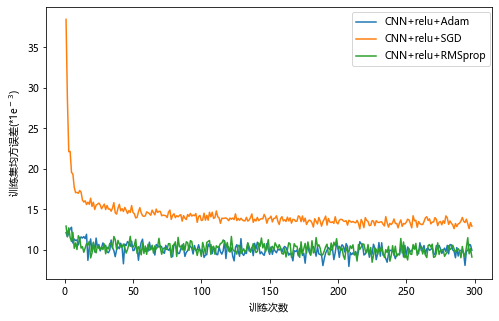

In [70]:
b = list(np.arange(1,299))

figsize = 8,5
figure, ax = plt.subplots(figsize=figsize)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.plot(b,loss_list_61[2:])
plt.plot(b,loss_list_62[2:])
plt.plot(b,loss_list_63[2:])


plt.legend(['CNN+relu+Adam','CNN+relu+SGD','CNN+relu+RMSprop'],loc='upper left', bbox_to_anchor=(0.675, 1))
plt.xlabel('训练次数')
plt.ylabel('训练集均方误差(*1e$^-$$^3$)')
plt.show()

In [21]:
read_temp=scipy.io.loadmat(r"C:\Users\Administrator\Desktop\DEEPDOA\code\data2test\data2_test.mat")
K=2
k=1

S_est=read_temp['S_est']
S_label=read_temp['S_label']
R_est=read_temp['R_est']
DOA_train=read_temp['DOA_train']
theta=read_temp['theta']

In [22]:
S_est_TH = torch.Tensor(S_est).permute(0,2,1)
S_est_TH = S_est_TH.to(device)
S_label_TH = torch.Tensor(S_label)



In [23]:
e = cnn_relu_resnet_6(S_est_TH)
e_1 = e[1,0]
e_2 = np.array(e_1.cpu().detach())
DCN5=np.zeros((120))
DCN5[:]=e_2

In [30]:
DOA_train[:,k]

array([-2.99967315,  3.03201247])

In [32]:
DCN5[:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06584044, 0.45291412, 0.39531529, 0.22963917,
       0.11473477, 0.17478278, 0.43845561, 0.38374606, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
DCN5[57]

0.45291411876678467

Text(0, 0.5, '功率谱')

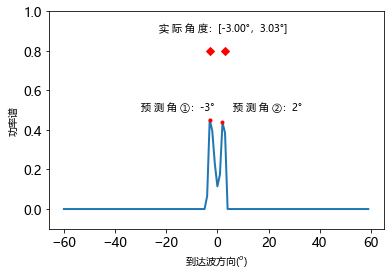

In [63]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
#figsize = 10,7
#figure, ax = plt.subplots(figsize=figsize)

#plt.subplot(131)
plt.plot(theta.T,(DCN5[:]),linewidth=2.0)
plt.ylim([-0.1,1.0])
plt.plot(DOA_train[:,k],np.ones((K,))*0.8,'rD')
plt.plot(-3,DCN5[57],"ro",markersize = 3)
plt.plot(2,DCN5[62],"ro",markersize = 3)
plt.annotate("预 测 角 ①：-3°",xy=(-3,0.5),xytext=(-30,0.5))
plt.annotate("预 测 角 ②：2°",xy=(2,0.5),xytext=(6,0.5))
plt.annotate("实 际 角 度：[-3.00°，3.03°]",xy=(-23,0.9),xytext=(-23,0.9))
plt.tick_params(labelsize=13)
plt.xlabel('到达波方向($^o$)')
plt.ylabel('功率谱') 
#plt.legend(["Adam"],loc='upper left')
#plt.show()

In [66]:
a = cnn_relu_4(S_est_TH)
a_1 = a[1,0]
a_2 = np.array(a_1.cpu().detach())
DCN1=np.zeros((120))
DCN1[:]=a_2

In [59]:
b = cnn_relu_4(S_est_TH)
b_1 = b[1,0]
b_2 = np.array(b_1.cpu().detach())
DCN2=np.zeros((120))
DCN2[:]=b_2

In [71]:
c = cnn_relu_4(S_est_TH)
c_1 = c[1,0]
c_2 = np.array(c_1.cpu().detach())
DCN3=np.zeros((120))
DCN3[:]=c_2

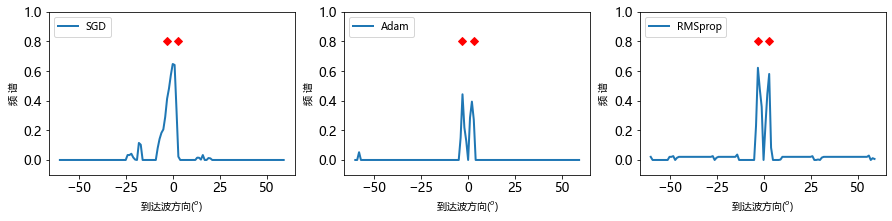

In [73]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
figsize = 15,3
figure, ax = plt.subplots(figsize=figsize)

plt.subplot(131)
plt.plot(theta.T,(DCN1[:]),linewidth=2.0)
plt.ylim([-0.1,1.0])
plt.plot(DOA_train[:,k],np.ones((K,))*0.8,'rD')
plt.tick_params(labelsize=13)
plt.xlabel('到达波方向($^o$)')
plt.ylabel('频 谱') 
plt.legend(["SGD"],loc='upper left')
#plt.show()

plt.subplot(132)
plt.plot(theta.T,(DCN2[:]),linewidth=2.0)
plt.ylim([-0.1,1.0])
plt.plot(DOA_train[:,k],np.ones((K,))*0.8,'rD')
plt.tick_params(labelsize=13)
plt.xlabel('到达波方向($^o$)')
plt.ylabel('频 谱') 
plt.legend(["Adam"],loc='upper left')
#plt.show()

plt.subplot(133)
plt.plot(theta.T,(DCN3[:]),linewidth=2.0)
plt.ylim([-0.1,1.0])
plt.plot(DOA_train[:,k],np.ones((K,))*0.8,'rD')
plt.tick_params(labelsize=13)
plt.xlabel('到达波方向($^o$)')
plt.ylabel('频 谱') 
plt.legend(["RMSprop"],loc='upper left')
#plt.show()